In [2]:
pip install pandas scikit-learn nltk


In [1]:
import pandas as pd

# Load the dataset, specifying the error_bad_lines parameter
df = pd.read_csv('/content/Fake.csv', on_bad_lines='skip')
# Skips lines with too many fields

print(df.head())

                                               title  \
0   Donald Trump Sends Out Embarrassing New Year’...   
1   Drunk Bragging Trump Staffer Started Russian ...   
2   Sheriff David Clarke Becomes An Internet Joke...   
3   Trump Is So Obsessed He Even Has Obama’s Name...   
4   Pope Francis Just Called Out Donald Trump Dur...   

                                                text subject  \
0  Donald Trump just couldn t wish all Americans ...    News   
1  House Intelligence Committee Chairman Devin Nu...    News   
2  On Friday, it was revealed that former Milwauk...    News   
3  On Christmas day, Donald Trump announced that ...    News   
4  Pope Francis used his annual Christmas Day mes...    News   

                date  
0  December 31, 2017  
1  December 31, 2017  
2  December 30, 2017  
3  December 29, 2017  
4  December 25, 2017  


In [3]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer

# Download stopwords if you haven't already
nltk.download('stopwords')

# Initialize the stemmer and stopwords
ps = PorterStemmer()
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    # Tokenization and normalization
    tokens = text.split()
    # Remove stop words and perform stemming
    tokens = [ps.stem(word) for word in tokens if word.lower() not in stop_words]
    return ' '.join(tokens)

# **Change 'text_column' to the actual name of the column containing the text data.**
# For example, if the column is named 'title', the line should be:
df['cleaned_text'] = df['title'].apply(preprocess_text)
# If the column is named 'text', use 'text' instead of 'title'.
# Print the column names to confirm:
print(df.columns)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Index(['title', 'text', 'subject', 'date', 'cleaned_text'], dtype='object')


In [4]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['cleaned_text'])
# Assuming the label column is named 'subject'
y = df['subject']  # Replace 'subject' with the actual label column name if different
# To find out the actual label column name, print the columns:
# print(df.columns)

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [6]:
from sklearn.naive_bayes import MultinomialNB

model = MultinomialNB()
model.fit(X_train, y_train)


MultinomialNB()

In [7]:
from sklearn.svm import LinearSVC

# Initialize and fit the LinearSVC model
model = LinearSVC()
model.fit(X_train, y_train)

# Check training completion
print("Model training completed.")


Model training completed.


In [8]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

y_pred = model.predict(X_test)
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print(classification_report(y_test, y_pred))


Accuracy: 0.5385726320856902
                 precision    recall  f1-score   support

Government News       0.33      0.24      0.28       587
    Middle-east       0.15      0.14      0.14       315
           News       0.90      0.91      0.90      2570
        US_News       0.17      0.17      0.17       318
      left-news       0.28      0.25      0.26      1745
       politics       0.47      0.53      0.49      2774

       accuracy                           0.54      8309
      macro avg       0.38      0.37      0.38      8309
   weighted avg       0.53      0.54      0.53      8309



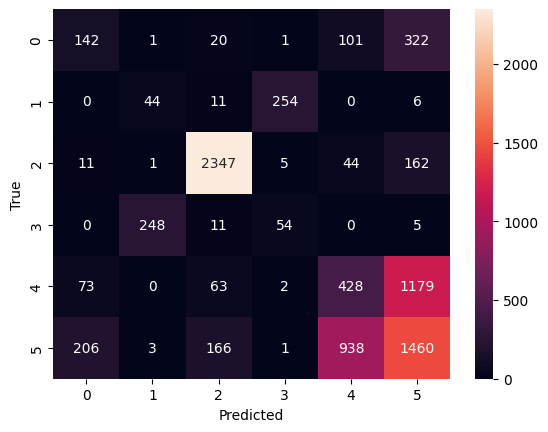

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


In [10]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(model, X, y, cv=5)
print(f'Cross-validation scores: {scores}')


Cross-validation scores: [0.64905524 0.65796125 0.65976652 0.63818007 0.68343765]
